# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Salsabila Azzahra
- **Email:** salsabilaazzhr@gmail.com / m001b4kx4036@bangkit.academy
- **ID Dicoding:** salsa-zzhra

# Business Questions

- What is the correlation between temperature and ozone levels across all stations?
- How do air quality parameters (PM2.5, PM10) differ between weekdays and weekends in Dongsi?
- Which station has the highest and lowest air quality parameters (PM2.5, PM10, SO2, NO2, CO, O3) on average?

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gatherting Data

In [148]:
dataframes = {}  # Dictionary to store dataframes

csv_files = [file for file in os.listdir("data/") if file.endswith('.csv')]

for file in csv_files:
    # Taking location string from filename
    location_name = file.split('_')[2]  # e.g. "Wanshouxigong" from "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
    variable_name = f"{location_name.lower()}"  # Make desired variable name

    # Read file and store it to vaiables
    dataframes[variable_name] = pd.read_csv(os.path.join('data/', file))

In [149]:
# Concatenate all dataframes into a single dataframe
all_data = pd.concat(dataframes.values(), ignore_index=True)
all_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- All the file in dataset is the same format
- Using dictionary to store the data

### Assessing Data

In [150]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [151]:
all_data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [152]:
dataframes["dongsi"].isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [153]:
# Calculate the percentage of missing values for all_data
missing_percentage_all_data = round(all_data.isnull().sum() / len(all_data.index), 2) * 100

# Calculate the percentage of missing values for dataframes["dongsi"]
missing_percentage_dongsi = round(dataframes["dongsi"].isnull().sum() / len(dataframes["dongsi"].index), 2) * 100

# Combine the results into a single DataFrame
missing_percentage_comparison = pd.DataFrame({
    'all_data': missing_percentage_all_data,
    'dongsi': missing_percentage_dongsi
})

# Display the combined missing value percentages
print("Percentage of missing values in all_data and dongsi:")
print(missing_percentage_comparison)

Percentage of missing values in all_data and dongsi:
         all_data  dongsi
No            0.0     0.0
year          0.0     0.0
month         0.0     0.0
day           0.0     0.0
hour          0.0     0.0
PM2.5         2.0     2.0
PM10          2.0     2.0
SO2           2.0     2.0
NO2           3.0     5.0
CO            5.0     9.0
O3            3.0     2.0
TEMP          0.0     0.0
PRES          0.0     0.0
DEWP          0.0     0.0
RAIN          0.0     0.0
wd            0.0     0.0
WSPM          0.0     0.0
station       0.0     0.0


In [154]:
print("Jumlah duplikasi: ", all_data.duplicated().sum())

Jumlah duplikasi:  0


In [155]:
# Check for duplicates on each dataframe
for file in dataframes:
    print(file)
    print(dataframes[file].duplicated().sum())

aotizhongxin
0
changping
0
dingling
0
dongsi
0
guanyuan
0
gucheng
0
huairou
0
nongzhanguan
0
shunyi
0
tiantan
0
wanliu
0
wanshouxigong
0


In [156]:
all_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- There are some missing values in the dataset, and it shows in the air quality parameters
- There are zero duplicates
- The data types are correct and there are no anomalies

### Cleaning Data

In [157]:
# Check how the missing values are represented in all features
# all_data[all_data['PM2.5'].isna()]
# all_data[all_data.PM10.isna()]
# all_data[all_data.SO2.isna()]
# all_data[all_data.NO2.isna()]
# all_data[all_data.CO.isna()]
# all_data[all_data.O3.isna()]
# all_data[all_data.TEMP.isna()]
# all_data[all_data.DEWP.isna()]
# all_data[all_data.RAIN.isna()]
# all_data[all_data.wd.isna()]
all_data[all_data.WSPM.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419789,34086,2017,1,19,5,111.0,137.0,40.0,84.0,2800.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
419790,34087,2017,1,19,6,124.0,142.0,32.0,84.0,2700.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
419791,34088,2017,1,19,7,114.0,143.0,32.0,83.0,2800.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
419989,34286,2017,1,27,13,46.0,68.0,11.0,13.0,700.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong


Since the missing value is represented as NaN, we can use the `fillna()` method to fill in the missing values. We can fill in the missing values with the median

In [158]:
# Fill missing values with median for numerical columns in all_data
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']
for col in numerical_columns:
    all_data[col] = all_data[col].fillna(all_data[col].median())

# Fill missing values in RAIN with 0 in all_data
all_data['RAIN'] = all_data['RAIN'].fillna(0)

# Fill missing values in wind direction (wd) and wind speed (WSPM) with forward fill (ffill) in all_data
all_data['wd'] = all_data['wd'].ffill()
all_data['WSPM'] = all_data['WSPM'].ffill()

# Fill missing values with median for numerical columns in dataframes["dongsi"]
for col in numerical_columns:
    dataframes["dongsi"][col] = dataframes["dongsi"][col].fillna(dataframes["dongsi"][col].median())

# Fill missing values in RAIN with 0 in dataframes["dongsi"]
dataframes["dongsi"]['RAIN'] = dataframes["dongsi"]['RAIN'].fillna(0)

# Fill missing values in wind direction (wd) and wind speed (WSPM) with forward fill (ffill) in dataframes["dongsi"]
dataframes["dongsi"]['wd'] = dataframes["dongsi"]['wd'].ffill()
dataframes["dongsi"]['WSPM'] = dataframes["dongsi"]['WSPM'].ffill()

**Insight:**
- Missing values represented as 'NaN'
- In the context of air quality, it's very possible that the missing value is an observation of air quality features. For example, the value '0' in the 'RAIN' feature could mean that the RAIN level is very low or even non-existent. Context matters in this case, so we should be careful when filling in missing values.

## Exploratory Data Analysis (EDA)

In [159]:
# Define a function to calculate the correlation between TEMP and O3
def calculate_correlation(group):
    return group['TEMP'].corr(group['O3'])

# Group by 'station' and calculate the correlation between 'TEMP' and 'O3' for each group
correlation_by_station = all_data.groupby('station')[['TEMP', 'O3']].apply(calculate_correlation)

# Display the correlation for each station
print("Correlation between temperature and ozone levels by station:")
print(correlation_by_station)

Correlation between temperature and ozone levels by station:
station
Aotizhongxin     0.577770
Changping        0.623041
Dingling         0.569622
Dongsi           0.574256
Guanyuan         0.601396
Gucheng          0.612696
Huairou          0.558720
Nongzhanguan     0.604862
Shunyi           0.570793
Tiantan          0.573000
Wanliu           0.581301
Wanshouxigong    0.608779
dtype: float64


**Insight:** The correlation between temperature and ozone levels across all stations is positive

In [160]:
import calendar

dataframes["dongsi"]['date']=pd.to_datetime(dataframes["dongsi"][['year', 'month', 'day']])

def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

dataframes["dongsi"]['day_week'] = dataframes["dongsi"]['date'].apply(lambda x: findDay(x))

# # Add a column to indicate whether it's a weekend
# all_data['is_weekend'] = all_data['datetime'].dt.dayofweek.isin([5, 6])
# dataframes["dongsi"]['is_weekend'] = dataframes["dongsi"]['datetime'].dt.dayofweek.isin([5, 6])

In [161]:
# Custom Day
custom_day = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

In [162]:
# Define the air quality parameters
params = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']    

In [163]:
# Calculate summary statistics (max, min, mean, std) for each air quality parameter grouped by 'day'
summary_stats = dataframes["dongsi"].groupby(by="day_week").agg({
    'PM2.5': ['max', 'min', 'mean', 'std'],
    'PM10': ['max', 'min', 'mean', 'std'],
}).reset_index()

summary_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary_stats.columns.values]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_week' to a categorical type with the specified order
summary_stats['day_week'] = pd.Categorical(summary_stats['day_week'], categories=day_order, ordered=True)

# Sort the DataFrame by 'day_week'
summary_stats = summary_stats.sort_values('day_week')

In [164]:
# Display the summary statistics
print("Summary statistics of air quality parameters in Dongsi by day of the week:")
summary_stats

Summary statistics of air quality parameters in Dongsi by day of the week:


,day_week,PM2.5_max,PM2.5_min,PM2.5_mean,PM2.5_std,PM10_max,PM10_min,PM10_mean,PM10_std
1,Monday,695.0,3.0,77.993002,79.093311,891.0,2.0,102.287640,91.795819
5,Tuesday,680.0,3.0,83.165251,83.793176,759.0,2.0,107.115311,92.860951
6,Wednesday,663.0,3.0,82.633393,82.073294,857.0,2.0,105.915405,92.599663
4,Thursday,603.0,3.0,83.470954,82.155182,672.0,2.0,108.592748,94.483911
0,Friday,737.0,3.0,90.791208,90.219284,848.0,2.0,113.430502,99.608711
2,Saturday,681.0,3.0,94.743880,94.694702,955.0,2.0,119.119996,108.183090
3,Sunday,589.0,3.0,86.765231,85.920631,816.0,3.0,113.183034,100.821437


**Insight:** The air quality parameters (PM2.5, PM10) differ between weekdays and weekends in Dongsi. The PM2.5 and PM10 levels are higher on weekdays than on weekends.

## Visualization & Explanatory Analysis

### Question 1: What is the correlation between temperature and ozone levels across all stations?

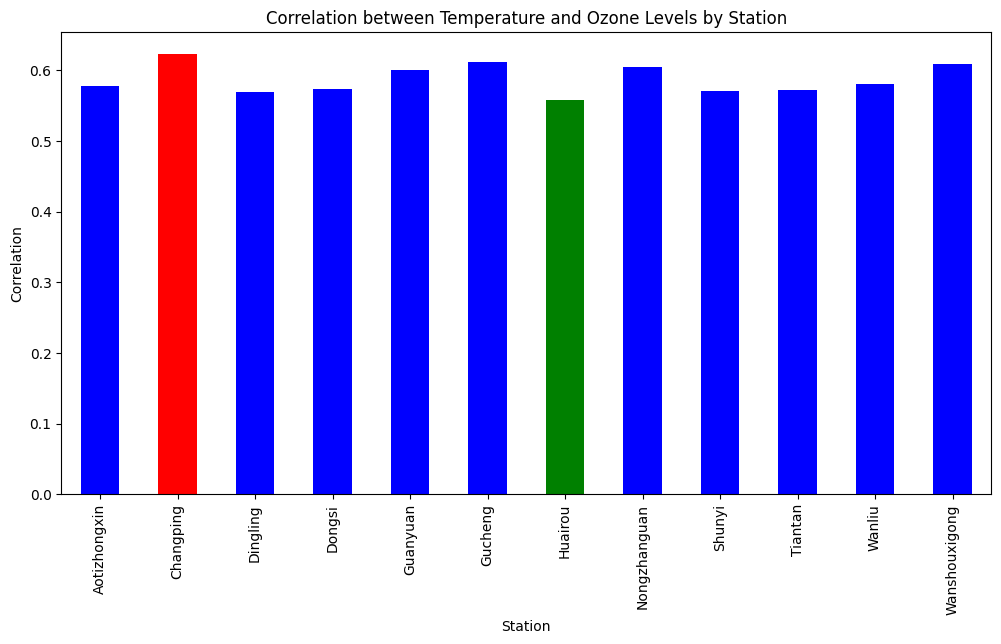

In [165]:
# Identify the highest and lowest correlation values
highest_correlation = correlation_by_station.max()
lowest_correlation = correlation_by_station.min()

# Define colors for the bars
colors = ['blue' if (val != highest_correlation and val != lowest_correlation) else 'red' if val == highest_correlation else 'green' for val in correlation_by_station]

# Plot the correlation for each station
plt.figure(figsize=(12, 6))
correlation_by_station.plot(kind='bar', color=colors)
plt.title('Correlation between Temperature and Ozone Levels by Station')
plt.xlabel('Station')
plt.ylabel('Correlation')
plt.show()

**Insight:**
- All stations consistently show a positive correlation between temperature and ozone levels
- Changping has the highest correlation between temperature and ozone levels, while Huairou has the lowest correlation

### Question 2: How do air quality parameters (PM2.5, PM10) differ between weekdays and weekends in Dongsi?

In [166]:
# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

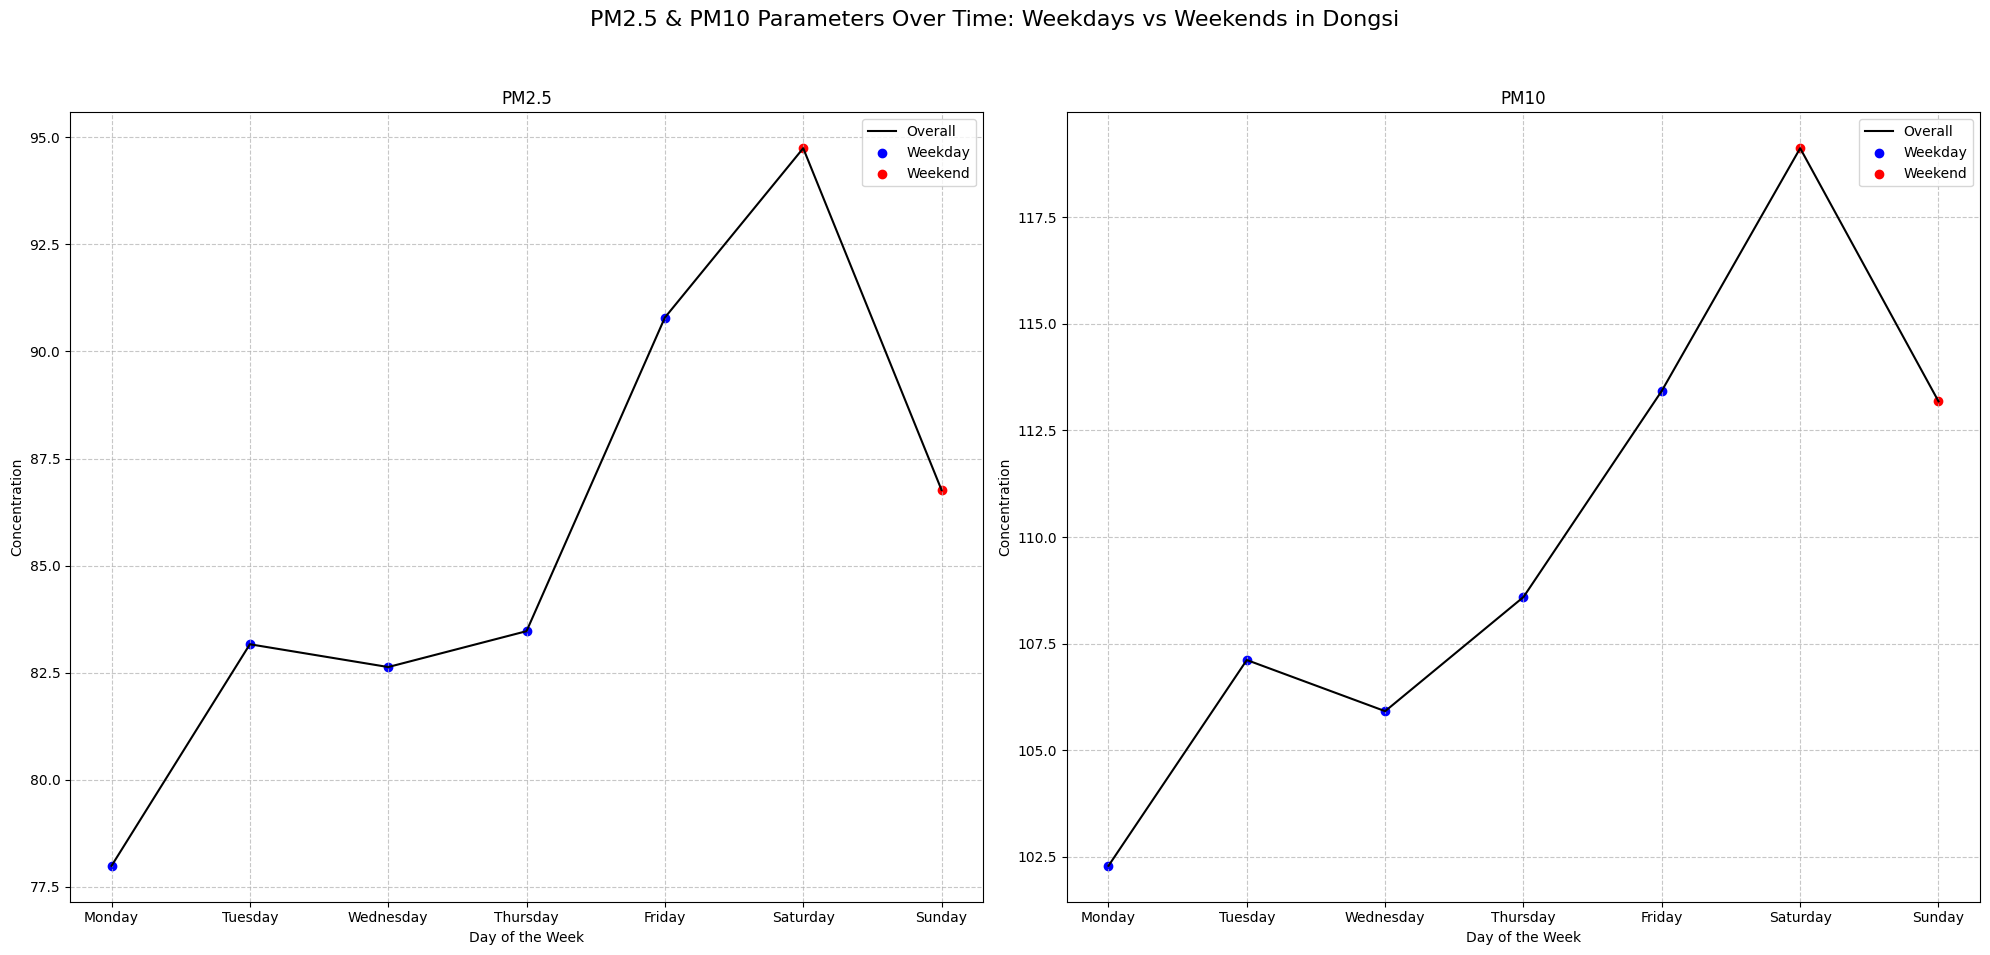

In [167]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('PM2.5 & PM10 Parameters Over Time: Weekdays vs Weekends in Dongsi', fontsize=16)

# Create a line plot for each parameter
for i, param in enumerate(params[:2]):  # Only take the first two parameters
    ax = axes[i]
    # Plot all data points together
    ax.plot(summary_stats['day_week'], summary_stats[f'{param}_mean'], color='black', label='Overall')
    
    # Highlight weekday data
    weekday_data = summary_stats[summary_stats['day_week'].isin(day_order[:5])]
    ax.scatter(weekday_data['day_week'], weekday_data[f'{param}_mean'], color='blue', label='Weekday')
    
    # Highlight weekend data
    weekend_data = summary_stats[summary_stats['day_week'].isin(day_order[5:])]
    ax.scatter(weekend_data['day_week'], weekend_data[f'{param}_mean'], color='red', label='Weekend')
    
    # Customize the plot
    ax.set_title(param)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Concentration')
    ax.legend()
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:**
The PM2.5 and PM10 levels are higher on weekdays than on weekends in Dongsi

### Question 3: Which station has the highest and lowest air quality parameters (PM2.5, PM10, SO2, NO2, CO, O3) on average?

In [168]:
station_means = all_data.groupby('station')[params].mean().reset_index()
melted_data = pd.melt(station_means, id_vars='station', value_vars=params)

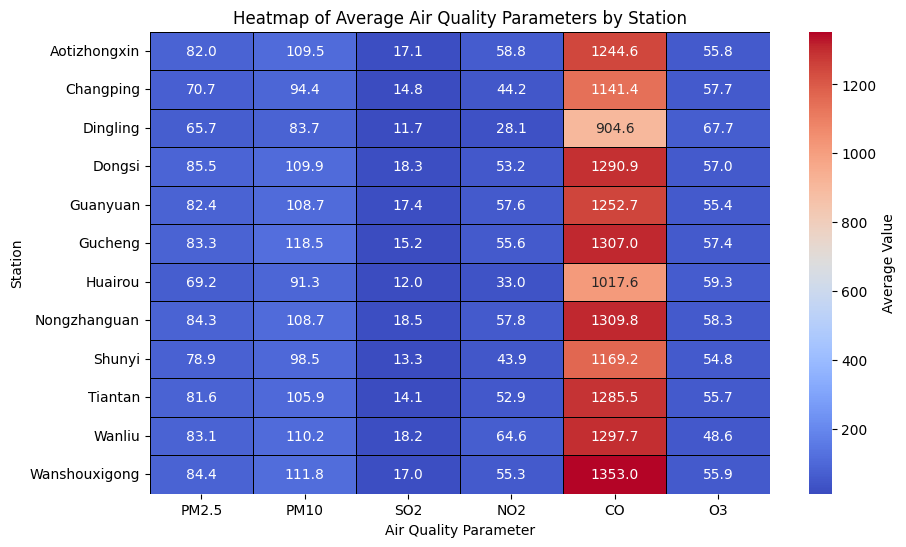

In [169]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(station_means.set_index('station'), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Average Value'})
plt.title('Heatmap of Average Air Quality Parameters by Station')
plt.ylabel('Station')
plt.xlabel('Air Quality Parameter')
plt.show()

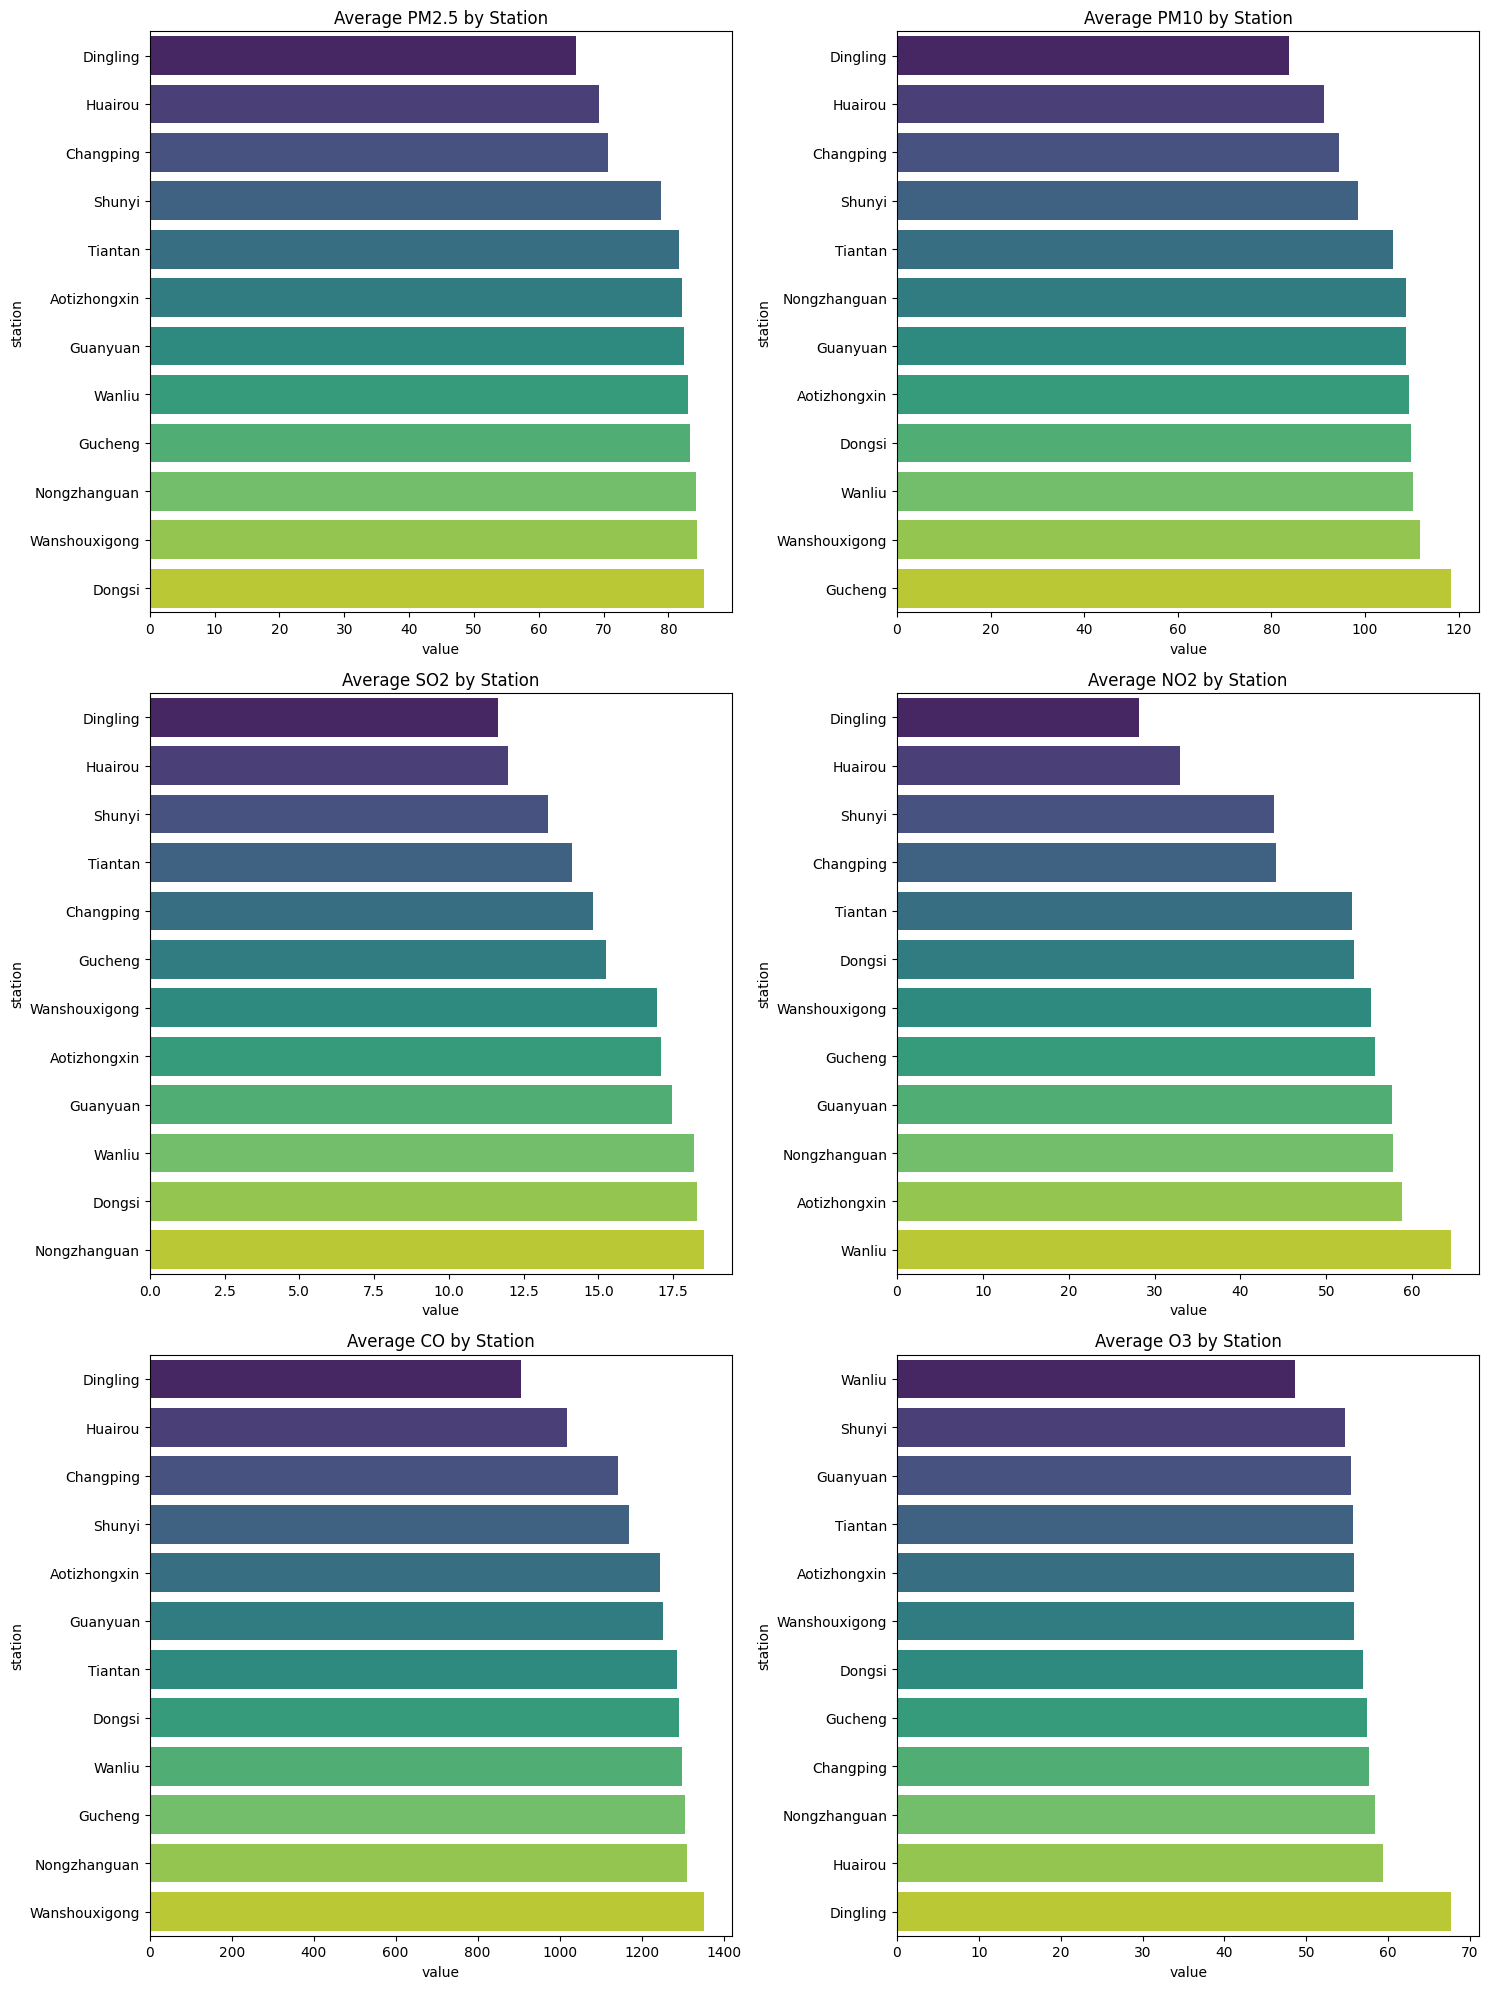

In [170]:
# Plot each parameter with highlights for highest and lowest
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, param in enumerate(params):
    ax = axes[i // 2, i % 2]
    data = melted_data[melted_data['variable'] == param].sort_values('value')
    
    data = melted_data[melted_data['variable'] == param].sort_values('value')
    sns.barplot(x='value', y='station', data=data, ax=ax, hue='station', palette='viridis', dodge=False, legend=False)
    highest, lowest = data.iloc[-1], data.iloc[0]
    
    ax.set_title(f'Average {param} by Station')

plt.tight_layout()
plt.show()

**Insight:**
- Dongsi has the highest average PM2.5 while Dingling has the lowest.
- Gucheng has the highest average PM10 while Dingling has the lowest.
- Nongzhanguan has the highest average SO2 while Dingling has the lowest.
- Wanliu has the highest average NO2 while Dingling has the lowest.
- Wanshouzigong has the highest average CO while Dingling has the lowest.
- Dingling has the highest average O3 while Wanliu has the lowest.

### Show geomap of air quality parameters (PM2.5, PM10, SO2, NO2, CO, O3) on average for each year

In [171]:
import folium
from folium.plugins import HeatMap

In [172]:
# Define numerical columns
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [173]:
# Define station coordinates
station_coords = {
    'Aotizhongxin': (116.397, 39.982),
    'Changping': (116.23, 40.217),
    'Dingling': (116.22, 40.292),
    'Dongsi': (116.417, 39.929),
    'Guanyuan': (116.339, 39.929),
    'Gucheng': (116.184, 39.914),
    'Huairou': (116.628, 40.328),
    'Nongzhanguan': (116.461, 39.937),
    'Shunyi': (116.655, 40.127),
    'Tiantan': (116.407, 39.886),
    'Wanliu': (116.287, 39.987),
    'Wanshouxigong': (116.352, 39.878)
}

# Add latitude and longitude to the DataFrame
all_data['latitude'] = all_data['station'].map(lambda x: station_coords[x][1])
all_data['longitude'] = all_data['station'].map(lambda x: station_coords[x][0])

In [174]:
# Interactive widgets for map
selected_year = 2017  # Example year, you can change this as needed
selected_param = 'PM2.5'  # Example parameter, you can change this as needed

# Filter data based on selected year and parameter
filtered_data = all_data[(all_data['year'] == selected_year)][['station', 'latitude', 'longitude', selected_param]]

In [175]:
# Create Folium map
map_center = [39.9042, 116.4074]
m = folium.Map(location=map_center, zoom_start=11, tiles='CartoDB positron')

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], row[selected_param]] for _, row in filtered_data.iterrows()]

# Add heatmap to the map
HeatMap(heat_data, radius=15, blur=10, max_zoom=1, gradient={0.4: 'blue', 0.65: 'lime', 0.8: 'yellow', 1: 'red'}).add_to(m)

In [176]:
# Add markers with station names and additional details
for station, coords in station_coords.items():
    # Calculate average values for the station
    station_data = all_data[all_data['station'] == station][numerical_columns].mean()
    popup_text = f"""
    <b>Station:</b> {station}<br>
    <b>PM2.5:</b> {station_data['PM2.5']:.2f}<br>
    <b>PM10:</b> {station_data['PM10']:.2f}<br>
    <b>SO2:</b> {station_data['SO2']:.2f}<br>
    <b>NO2:</b> {station_data['NO2']:.2f}<br>
    <b>CO:</b> {station_data['CO']:.2f}<br>
    <b>O3:</b> {station_data['O3']:.2f}
    """
    
    folium.Marker(
        location=[coords[1], coords[0]],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=station,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m

## Conclusion

- All stations consistently show a positive correlation between temperature and ozone levels.
- The PM2.5 and PM10 levels are higher on weekdays than on weekends in Dongsi.
- The highest and lowest average air quality parameters vary by station.